<a href="https://colab.research.google.com/github/toshkar/ALL-data/blob/main/ATR_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Данный код рассчитывает лаги автокорреляционной функции
# для последующего расчета коэффициентов формулы для определения ATR следующего дня.
# После прогона данных за 1 год по 30 акциям вычислена формула:
# ATR (следующего дня) = 0.2773 * ATR (предыдущего дня) + 0.2075 * ATR (дня -2) + 0.1816 * ATR (дня -3) + 0.1669 * ATR (дня -4) + 0.1666 * ATR (дня -5)
# Как видно на ATR следующего дня действуют ATR 5 предыдущих дней по убывающей. ATR вчерашнего дня оказывает большее влияние чем ATR 5 дней назад.
# ПОЛУЧЕННОЕ ЗНАЧЕНИЕ ATR БУДЕТ САМЫМ ТОЧНЫМ КОТОРОЕ ТОЛЬКО МОЖНО ПОСЧИТАТЬ. Его можно использовать для расчета объема входа в позицию на следующий день.

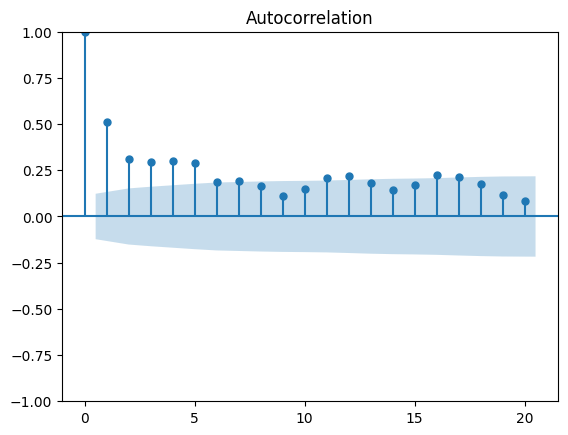

Лаг 0: 1.0000
Лаг 1: 0.5115
Лаг 2: 0.3090
Лаг 3: 0.2947
Лаг 4: 0.3017
Лаг 5: 0.2867
Лаг 6: 0.1882
Лаг 7: 0.1909
Лаг 8: 0.1633
Лаг 9: 0.1126
Лаг 10: 0.1477
Лаг 11: 0.2066
Лаг 12: 0.2206
Лаг 13: 0.1805
Лаг 14: 0.1443
Лаг 15: 0.1697
Лаг 16: 0.2241
Лаг 17: 0.2123
Лаг 18: 0.1779
Лаг 19: 0.1146
Лаг 20: 0.0825


In [26]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/toshkar/ALL-data/main/LKOH_231211_241206.csv',
                   index_col='<DATE>',
                   parse_dates=True,
                   sep=';')

# Расчет ATR = HIGH - LOW
data['ATR'] = data['<HIGH>'] - data['<LOW>']

# Удаление строк с NaN значениями (если таковые имеются)
data.dropna(inplace=True)

# Выбор столбца 'ATR'
atr_series = data['ATR']

# Построение графика автокорреляции
plot_acf(atr_series, lags=20)
plt.show()

# Расчет автокорреляции для первых 20 лагов
acf_values = acf(atr_series, nlags=20)

# Вывод результатов
for lag, value in enumerate(acf_values):
    print(f'Лаг {lag}: {value:.4f}')